# Assignment 2 - Unsupervised Learning 
`

#### Task 1 (3 points):

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

##### Look at features of Linnerud dataset
- Tell what is the problem with them

In [96]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_linnerud()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes


In [4]:
print (df)

    Chins  Situps  Jumps
0     5.0   162.0   60.0
1     2.0   110.0   60.0
2    12.0   101.0  101.0
3    12.0   105.0   37.0
4    13.0   155.0   58.0
5     4.0   101.0   42.0
6     8.0   101.0   38.0
7     6.0   125.0   40.0
8    15.0   200.0   40.0
9    17.0   251.0  250.0
10   17.0   120.0   38.0
11   13.0   210.0  115.0
12   14.0   215.0  105.0
13    1.0    50.0   50.0
14    6.0    70.0   31.0
15   12.0   210.0  120.0
16    4.0    60.0   25.0
17   11.0   230.0   80.0
18   15.0   225.0   73.0
19    2.0   110.0   43.0


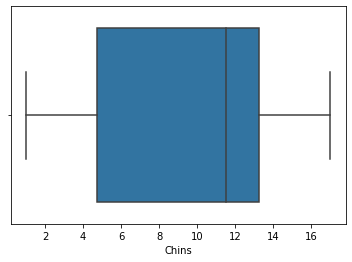

In [5]:
sns.boxplot(x=df['Chins'])

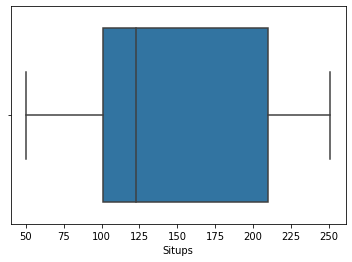

In [6]:
sns.boxplot(x=df['Situps'])

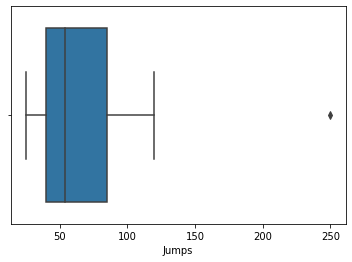

In [7]:
sns.boxplot(x=df['Jumps'])

Observation: 
      
      - The dataset are on different scales as clearly shown by the plots
      - Besides, we cannot tell the unit of measurement

##### Normalize & Plot
- Normalize these features using a correct method
- Plot original vs normalized probability density.

In [8]:
# we should use a minmaxscaler, because we don't have much outliers and we need the resultant features to be same scale
# but again we will use MaxAbsScaler, since out data is all positive

from sklearn.preprocessing import MaxAbsScaler

transformer = MaxAbsScaler().fit(df)
df_norm = transformer.transform(df)

In [9]:
print (df_norm)

[[0.29411765 0.64541833 0.24      ]
 [0.11764706 0.43824701 0.24      ]
 [0.70588235 0.40239044 0.404     ]
 [0.70588235 0.41832669 0.148     ]
 [0.76470588 0.61752988 0.232     ]
 [0.23529412 0.40239044 0.168     ]
 [0.47058824 0.40239044 0.152     ]
 [0.35294118 0.49800797 0.16      ]
 [0.88235294 0.79681275 0.16      ]
 [1.         1.         1.        ]
 [1.         0.47808765 0.152     ]
 [0.76470588 0.83665339 0.46      ]
 [0.82352941 0.85657371 0.42      ]
 [0.05882353 0.19920319 0.2       ]
 [0.35294118 0.27888446 0.124     ]
 [0.70588235 0.83665339 0.48      ]
 [0.23529412 0.23904382 0.1       ]
 [0.64705882 0.91633466 0.32      ]
 [0.88235294 0.89641434 0.292     ]
 [0.11764706 0.43824701 0.172     ]]


In [10]:
# calculate probabilities densities on original data
from scipy.stats import norm

#The syntax is: scipy.stats.norm.pdf(3, loc=mean, scale=std)
# mean is np.mean(data)
# standard deviation is np.std(data)

df['pd_Chins'] = norm.pdf(df['Chins'], loc=np.mean(df['Chins']), scale=np.std(df['Chins']))
df['pd_Situps'] = norm.pdf(df['Situps'], loc=np.mean(df['Situps']), scale=np.std(df['Situps']))
df['pd_Jumps'] = norm.pdf(df['Jumps'], loc=np.mean(df['Jumps']), scale=np.std(df['Jumps']))

In [11]:
print(df)

    Chins  Situps  Jumps  pd_Chins  pd_Situps  pd_Jumps
0     5.0   162.0   60.0  0.053324   0.006308  0.007814
1     2.0   110.0   60.0  0.027221   0.005520  0.007814
2    12.0   101.0  101.0  0.068503   0.005010  0.006610
3    12.0   105.0   37.0  0.068503   0.005244  0.006393
4    13.0   155.0   58.0  0.061068   0.006464  0.007744
5     4.0   101.0   42.0  0.044253   0.005010  0.006800
6     8.0   101.0   38.0  0.074422   0.005010  0.006478
7     6.0   125.0   40.0  0.061879   0.006181  0.006642
8    15.0   200.0   40.0  0.043346   0.004391  0.006642
9    17.0   251.0  250.0  0.026463   0.001467  0.000012
10   17.0   120.0   38.0  0.026463   0.005992  0.006478
11   13.0   210.0  115.0  0.061068   0.003742  0.005351
12   14.0   215.0  105.0  0.052428   0.003420  0.006273
13    1.0    50.0   50.0  0.020177   0.001917  0.007350
14    6.0    70.0   31.0  0.061879   0.003037  0.005859
15   12.0   210.0  120.0  0.068503   0.003742  0.004868
16    4.0    60.0   25.0  0.044253   0.002445  0

In [12]:
df_norm[:,0]

array([0.29411765, 0.11764706, 0.70588235, 0.70588235, 0.76470588,
       0.23529412, 0.47058824, 0.35294118, 0.88235294, 1.        ,
       1.        , 0.76470588, 0.82352941, 0.05882353, 0.35294118,
       0.70588235, 0.23529412, 0.64705882, 0.88235294, 0.11764706])

In [13]:
# converting df_norm into a dataframe for the calculation of probability densities

Chins = pd.DataFrame(df_norm[:,0], columns=['Chins']) 
Situps = pd.DataFrame(df_norm[:,1], columns=['Situps'])
Jumps = pd.DataFrame(df_norm[:,2], columns=['Jumps'])

df_norm_df = Chins.join(Situps)
df_norm_df = df_norm_df.join(Jumps)

print(df_norm_df)

       Chins    Situps  Jumps
0   0.294118  0.645418  0.240
1   0.117647  0.438247  0.240
2   0.705882  0.402390  0.404
3   0.705882  0.418327  0.148
4   0.764706  0.617530  0.232
5   0.235294  0.402390  0.168
6   0.470588  0.402390  0.152
7   0.352941  0.498008  0.160
8   0.882353  0.796813  0.160
9   1.000000  1.000000  1.000
10  1.000000  0.478088  0.152
11  0.764706  0.836653  0.460
12  0.823529  0.856574  0.420
13  0.058824  0.199203  0.200
14  0.352941  0.278884  0.124
15  0.705882  0.836653  0.480
16  0.235294  0.239044  0.100
17  0.647059  0.916335  0.320
18  0.882353  0.896414  0.292
19  0.117647  0.438247  0.172


In [14]:
# so probability densities for normalized data 

df_norm_df['pd_Chins'] = norm.pdf(df_norm_df['Chins'], loc=np.mean(df_norm_df['Chins']), scale=np.std(df_norm_df['Chins']))
df_norm_df['pd_Situps'] = norm.pdf(df_norm_df['Situps'], loc=np.mean(df_norm_df['Situps']), scale=np.std(df_norm_df['Situps']))
df_norm_df['pd_Jumps'] = norm.pdf(df_norm_df['Jumps'], loc=np.mean(df_norm_df['Jumps']), scale=np.std(df_norm_df['Jumps']))

In [15]:
print(df_norm_df)

       Chins    Situps  Jumps  pd_Chins  pd_Situps  pd_Jumps
0   0.294118  0.645418  0.240  0.906507   1.583357  1.953616
1   0.117647  0.438247  0.240  0.462765   1.385431  1.953616
2   0.705882  0.402390  0.404  1.164554   1.257450  1.652455
3   0.705882  0.418327  0.148  1.164554   1.316337  1.598321
4   0.764706  0.617530  0.232  1.038160   1.622427  1.936020
5   0.235294  0.402390  0.168  0.752304   1.257450  1.699961
6   0.470588  0.402390  0.152  1.265172   1.257450  1.619447
7   0.352941  0.498008  0.160  1.051937   1.551390  1.660545
8   0.882353  0.796813  0.160  0.736878   1.102204  1.660545
9   1.000000  1.000000  1.000  0.449874   0.368204  0.003111
10  1.000000  0.478088  0.152  0.449874   1.504048  1.619447
11  0.764706  0.836653  0.460  1.038160   0.939366  1.337718
12  0.823529  0.856574  0.420  0.891271   0.858504  1.568152
13  0.058824  0.199203  0.200  0.343009   0.481151  1.837545
14  0.352941  0.278884  0.124  1.051937   0.762246  1.464862
15  0.705882  0.836653  

In [16]:
# dropping un-needed features

df2 = df.drop(['Chins', 'Situps', 'Jumps'], axis='columns')
df_norm_df2 = df_norm_df.drop(['Chins', 'Situps', 'Jumps'], axis='columns')

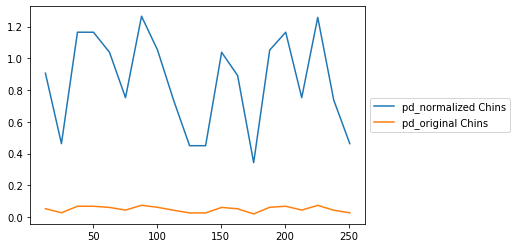

In [17]:
# Plot for Chins

# getting data of the histogram
count, bins_count = np.histogram(df, bins=20)

# plotting PDF and CDF
plt.plot(bins_count[1:], df_norm_df2.pd_Chins, label="pd_normalized Chins")
plt.plot(bins_count[1:], df2.pd_Chins, label="pd_original Chins")
#plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

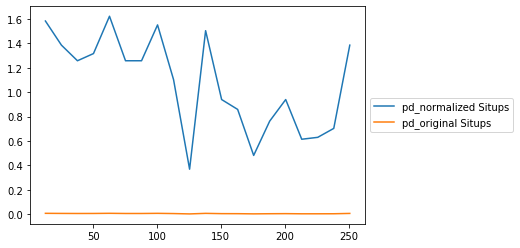

In [18]:
# Plot for Situps

# getting data of the histogram
count, bins_count = np.histogram(df, bins=20)

# plotting PDF and CDF
plt.plot(bins_count[1:], df_norm_df2.pd_Situps, label="pd_normalized Situps")
plt.plot(bins_count[1:], df2.pd_Situps, label="pd_original Situps")
#plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

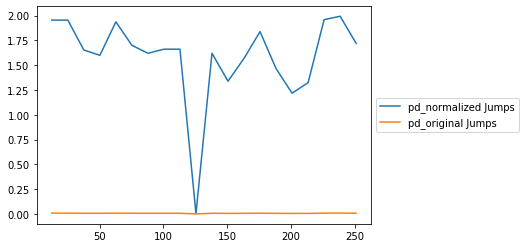

In [19]:
# Plot for Jumps

# getting data of the histogram
count, bins_count = np.histogram(df, bins=20)

# plotting PDF and CDF
plt.plot(bins_count[1:], df_norm_df2.pd_Jumps, label="pd_normalized Jumps")
plt.plot(bins_count[1:], df2.pd_Jumps, label="pd_original Jumps")
#plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Task 2 (4 points):  
2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

- Load 20 News Dataset

In [198]:
print (data['DESCR'])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [199]:
# Assignment 2 begins
import pandas as pd
import numpy as np 
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized(subset='train')

# dataset has 11314 samples and 130107 dimensions
X = data['data']
Y = data['target']

print(X.shape); print (Y.shape)

(11314, 130107)
(11314,)


- Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions.

  (Remember that you can load training and testing subsets of data!)

In [200]:
# Without KernelPCA application or scaling

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7919, 130107), (3395, 130107), (7919,), (3395,))

In [203]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.605301914580265


In [204]:
# With KernelPCA application
from sklearn.decomposition import KernelPCA


# scaling
# We are made to understand when this dataset is loaded that it has already been normalised with sklearn normalizer but 
# we saw that when we scaled the score is better
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import MaxAbsScaler 

scaler = StandardScaler(with_mean=False)
#scaler = MaxAbsScaler(copy=True)

scaler.fit(X)
X_scaled = scaler.transform(X)



# We will try 5 different dimensions 100, 50, 25, 12, 7


######################################################### 100 Dimensions

transformer = KernelPCA(n_components=100, kernel="sigmoid", n_jobs = -1) # n_jobs = -1, uses all the core in my pc to make this faster
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6441826215022092


In [64]:
######################################################### 50 Dimensions

transformer = KernelPCA(n_components=50, kernel="sigmoid", n_jobs = -1)
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6159057437407953


In [65]:
######################################################### 25 Dimensions

transformer = KernelPCA(n_components=25, kernel="sigmoid", n_jobs = -1) 
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5994108983799705


In [66]:
######################################################### 12 Dimensions

transformer = KernelPCA(n_components=12, kernel="sigmoid", n_jobs = -1)
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5204712812960236


In [249]:
######################################################### 7 Dimensions

transformer = KernelPCA(n_components=7, kernel="sigmoid", n_jobs = -1)
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3387334315169367


OBSERVATION:
1. The kernelPCA obvious had a better score than the original dataset
2. The kernel sigmoid is able to discribe the data points best in higher dimensional space but performs poorly in lower dimensionals
3. And sigmoid is the best performing of all the kernel parameters; I believe there is non-linearity in the data points of 
this dataset 
4. I expected the scores to get better with reduction of dimensions put the opposite is the case. I suspect that this case needs more dimensions to work better

#### How will the classifier behave with parameter tuning

In [250]:
# using max_depth=10

######################################################### 7 Dimensions

transformer = KernelPCA(n_components=7, kernel="sigmoid", n_jobs = -1)
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## playing with max_depth increased accuracy

Accuracy: 0.37142857142857144


In [251]:
# Specifying minimum samples before split
min_samples_split=20

######################################################### 7 Dimensions

transformer = KernelPCA(n_components=7, kernel="sigmoid", n_jobs = -1)
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## playing with min_samples_split futher increased accuracy

Accuracy: 0.3767304860088365


In [255]:
# Specifying minimum samples in leaf node


######################################################### 7 Dimensions

transformer = KernelPCA(n_components=7, kernel="sigmoid", n_jobs = -1)
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=1, random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## playing with min_samples_leaf did not improve accuracy

Accuracy: 0.3767304860088365


In [256]:
# Using Entropy instead of Gini

######################################################### 7 Dimensions

transformer = KernelPCA(n_components=7, kernel="sigmoid", n_jobs = -1)
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=20, criterion="entropy", random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Using Entropy did not improve accuracy

Accuracy: 0.3596465390279823


#### Hyper-parameter tuning

In [285]:
from sklearn.model_selection import GridSearchCV

######################################################### 7 Dimensions

transformer = KernelPCA(n_components=7, kernel="sigmoid", n_jobs = -1)
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2,4,8,10,11,12,15],
    'min_samples_leaf': [1,2,3,4,5,6,7],
    'criterion': ["gini", "entropy"]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 98 candidates, totalling 392 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 392 out of 392 | elapsed:   29.5s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [286]:
#grid_search.score(X_test)

score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024983,0.001872,0.001000,4.256623e-07,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.158081,0.155556,0.158586,0.163214,0.158859,0.002764,92
1,0.027233,0.002946,0.001500,4.998448e-04,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.158081,0.155556,0.158586,0.163214,0.158859,0.002764,92
2,0.026734,0.002772,0.001000,1.352645e-06,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.158081,0.155556,0.158586,0.163214,0.158859,0.002764,92
3,0.025485,0.002061,0.000999,5.430242e-07,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.158081,0.155556,0.158586,0.163214,0.158859,0.002764,92
4,0.025984,0.001581,0.001000,3.769729e-07,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.158081,0.155556,0.158586,0.163214,0.158859,0.002764,92


In [287]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [289]:
# lets fit our model again with these parameters

######################################################### 7 Dimensions

transformer = KernelPCA(n_components=7, kernel="sigmoid", n_jobs = -1)
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=5,min_samples_split=2,presort='deprecated',random_state=42, splitter='best')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## the score is close to when we manual tweaked the model

Accuracy: 0.3628865979381443


In [292]:
# But how will another classifier do?

# lets see a KNN

from sklearn.neighbors import KNeighborsClassifier


######################################################### 7 Dimensions

transformer = KernelPCA(n_components=7, kernel="sigmoid", n_jobs = -1)
X_transformed = transformer.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train Decision Tree Classifer
knn_model = knn_model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = knn_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## With tweaking nearest neighbors, we could achieve a better score than the decision tree with out hyper parameter tuning

Accuracy: 0.3861561119293078


#### Task 3 (8 points):

3. Clustering
    - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
          Did you manage to recover the original clusters?  (give students an example plot)

In [86]:
### Cluster 20 News Dataset into 20 clusters

from sklearn.cluster import KMeans

transformer = KernelPCA(n_components=100, kernel="sigmoid")
X_transformed = transformer.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=20)
kmeans.fit(X_transformed)
y_kmeans = kmeans.predict(X_transformed)

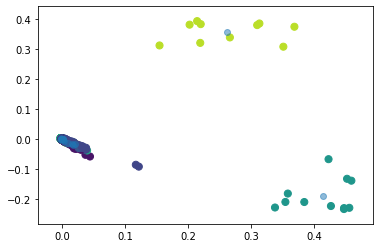

In [92]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], alpha=0.5);

Observation:
After the data was kernelPCA transform, we can make out about 4 prominent clusters

In [88]:
###  Print true class vs cluster distribution.


# Get the cluster centroids or distribution
print(kmeans.cluster_centers_)
    
# Get the cluster labels or classes
print(kmeans.labels_)

[[ 6.68939810e-04 -1.47212013e-03  1.61923069e-03 ... -1.58790918e-02
  -3.26557655e-04  4.74040138e-03]
 [ 9.25186689e-03 -1.50741071e-02  1.22232389e-01 ...  4.51176524e-03
   1.32019751e-03  3.34277102e-04]
 [-8.17125127e-04 -2.90105857e-04 -4.18814202e-04 ... -1.49636021e-03
  -6.73639039e-03 -3.53895945e-03]
 ...
 [ 2.61608212e-01  3.57838662e-01  1.82899996e-02 ...  9.46000726e-04
   6.54768323e-04  7.19045680e-05]
 [ 1.64345114e-02 -1.89148940e-02 -1.96525542e-03 ... -4.24515523e-03
   1.07584678e-03 -1.95753459e-04]
 [ 7.03488310e-04 -1.06284454e-03 -2.03969341e-02 ...  8.41446083e-03
  -1.49263295e-02  9.68294849e-03]]
[15  4  3 ...  4  4  2]


In [168]:
X=data.data
scaler = StandardScaler(with_mean=False)
scaler.fit(X)
X_scaled = scaler.transform(X)

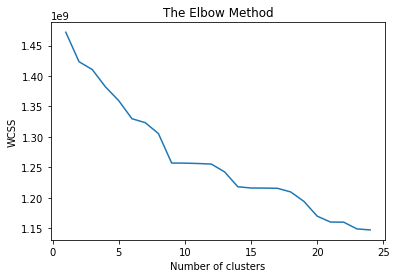

In [172]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,25):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,25),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

OBSERVATION: 

By the example plot above, We see several original elbow points indicating number of clusters, we major ones as just before 10 and 15 and at 20.


#### Printing classes and their predictions

In [175]:
Y = data['target']

# some generated clusters
Clusters = Y.copy()
Clusters[:3000] = 3

In [177]:
Clusters.shape

(11314,)

In [178]:
print(Clusters)

[ 3  3  3 ... 14 12 11]


Printing classes and their predictions

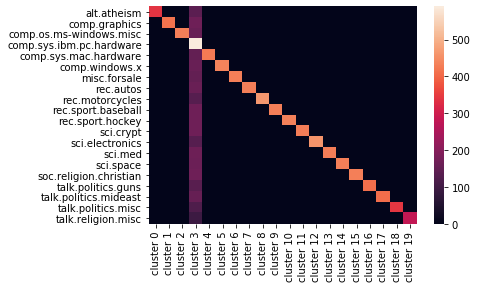

In [179]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(Y, Clusters)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])

Observation:
    1. Cluster 3(comp.sys.ibm.pc.hardware) shows signs of the most active with over 500 news items
    2. Cluster O(atheism), Cluster 18(talk.politics.misc) and Cluster 19(talk.religion.misc) showed the least activity